In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from preprocessing import *

In [2]:
# Loading Data
data_raw = pd.read_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/mxmh_survey_results.csv')

In [3]:
# Dropping Irrelevant Features
cols_drop = ['Permissions', 'Music effects', 'Timestamp']
drop_features = drop_irreleveant(data_raw, cols_drop)

In [4]:
# Convert Mental Illness Scores to Categorical
features_range = ['Anxiety', 'Depression', 'OCD', 'Insomnia']
data_ranged = convert_ranges(drop_features, features_range)

In [5]:
# One Hot Encode Features
cols_dummy = ["Primary streaming service", "Fav genre"]
one_hot_df = one_hot_encode(data_ranged, cols_dummy)

In [ ]:
# Label Encoding Features
encode_features = ["While working" , "Instrumentalist", "Composer", "Exploratory", "Foreign Languages"] 

Visualizations

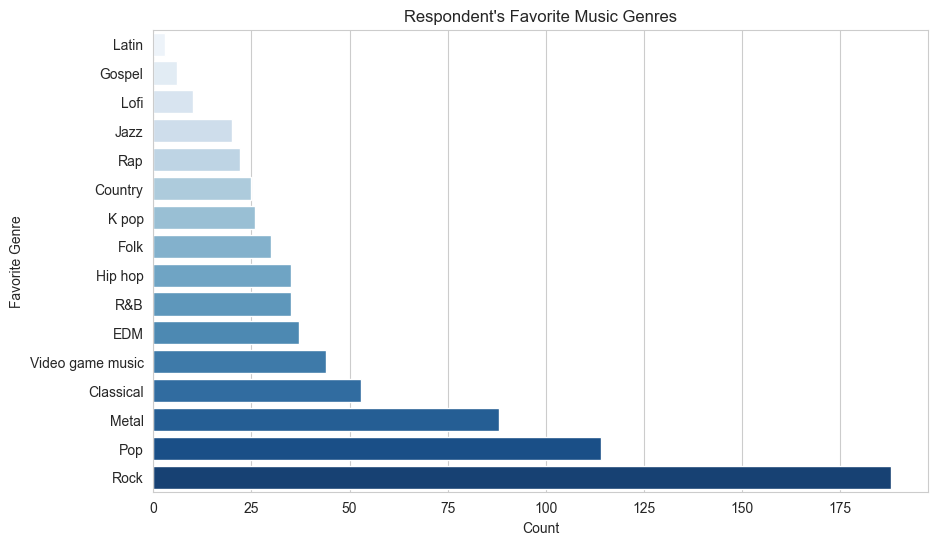

In [46]:
# Distribution of Favorite Genre

fav_genre_df = (data_raw.groupby("Fav genre")
                      .agg(count = ('Fav genre','count')).sort_values(by='count', ascending=True))
fav_genre_df.reset_index(inplace=True)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=fav_genre_df['count'], y=fav_genre_df['Fav genre'], palette="Blues")
plt.xlabel('Count')
plt.ylabel('Favorite Genre')
plt.title('Respondent\'s Favorite Music Genres')
plt.show()

In [76]:
# Distribution of Musical Genre Frequency Listening
val_count_dict = {}

cols = ["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", 'Frequency [Gospel]', "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]", "Frequency [Metal]", "Frequency [Pop]","Frequency [R&B]", "Frequency [Rap]",'Frequency [Rock]', 'Frequency [Video game music]']
col_label = ['Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hip Hop', 'Jazz', 'K Pop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'Video Game Music']
value_order = ['Never', 'Rarely', 'Sometimes', 'Very frequently']

for val in cols:
    count = data_raw[val].value_counts()
    val_count_dict[val] = count

count_df = pd.concat(val_count_dict, axis=1)
count_df.columns = col_label
count_df = count_df.reindex(value_order)
final_count = count_df.transpose()

In [78]:
final_count

,Never,Rarely,Sometimes,Very frequently
Classical,169,259,200,108
Country,343,233,111,49
EDM,307,194,146,89
Folk,292,221,145,78
Gospel,535,135,52,14
Hip Hop,181,214,218,123
Jazz,261,247,175,53
K Pop,416,176,67,77
Latin,443,172,88,33
Lofi,280,211,160,85


In [ ]:
# Graph Distribution of Mental Illness for Frequency Ranges

In [ ]:
# Graph of Pearson Correlation Matrices